<ipython-input-5-fd44eed59c52>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["loan_status"], palette="coolwarm")


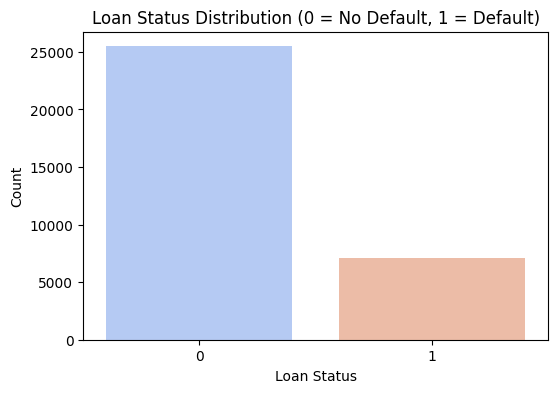

<ipython-input-5-fd44eed59c52>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")


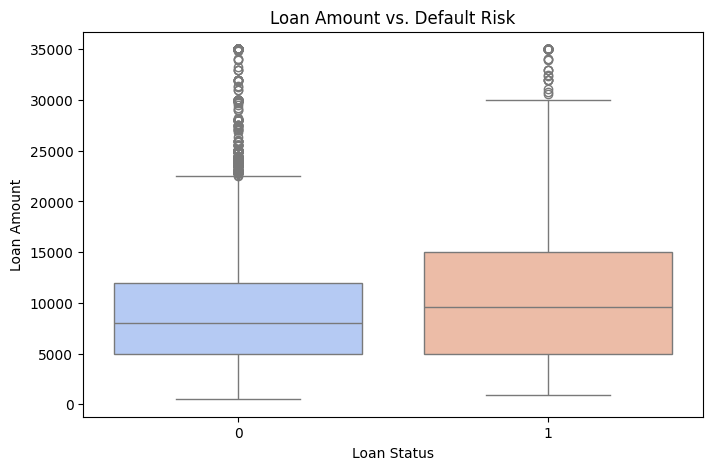

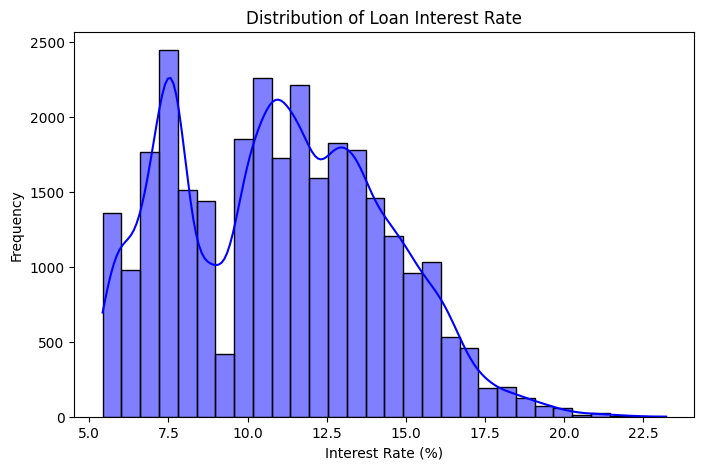

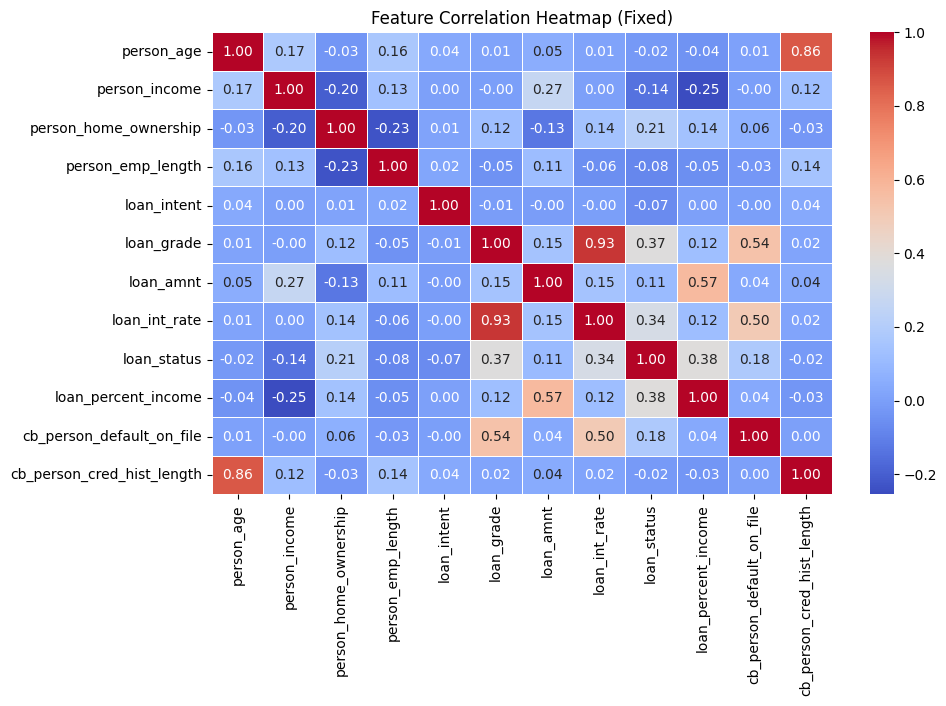

<ipython-input-5-fd44eed59c52>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
<ipython-input-5-fd44eed59c52>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Random Forest Accuracy: 0.9320
Confusion Matrix:
 [[5065   30]
 [ 413 1009]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



<ipython-input-5-fd44eed59c52>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


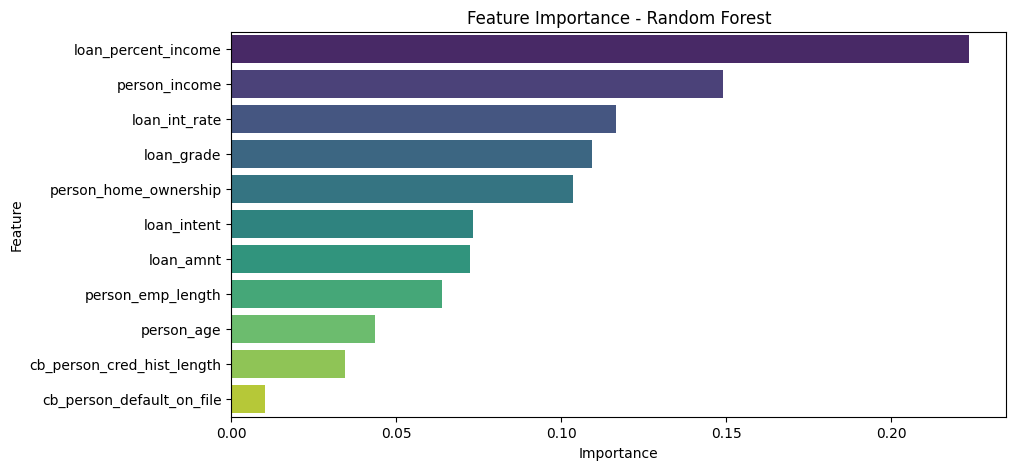

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/content/credit_risk_dataset.csv"
df = pd.read_csv(file_path)

eda_report = df.describe().to_string()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["loan_status"], palette="coolwarm")
plt.title("Loan Status Distribution (0 = No Default, 1 = Default)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")
plt.title("Loan Amount vs. Default Risk")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["loan_int_rate"], bins=30, kde=True, color="blue")
plt.title("Distribution of Loan Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

correlation_matrix_fixed = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_fixed, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap (Fixed)")
plt.show()

# --- 2. Data Preprocessing ---

df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

categorical_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["loan_status"])
y = df["loan_status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Logistic Regression Model ---

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)


accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

# --- 4. Random Forest Model ---


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

feature_importances = pd.DataFrame({"Feature": df.drop(columns=["loan_status"]).columns,
                                    "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()


# **Corporate Credit Risk Assessment Report**

Executive Summary:

This report provides a comprehensive credit risk assessment utilizing predictive analytics to enhance financial decision-making. Our goal is to improve loan approval efficiency, minimize default risk, and ensure the financial stability of our lending operations through data-driven insights.

1. Data Overview & Risk Factors

1.1 Dataset Overview

Total Records: 32,581

Key Variables: Applicant demographics, financial indicators, loan parameters, and credit history.

Data Quality: Missing values in loan_int_rate and person_emp_length were handled using median imputation to ensure analytical consistency.

1.2 Key Risk Insights

Default Trends: A significant portion of applicants default on loans, necessitating a more stringent risk assessment.

Loan Amount & Default Probability: Higher loan amounts exhibit a correlation with increased default likelihood.

Interest Rate Sensitivity: Borrowers with higher interest rates demonstrate an increased risk of default.

Income & Employment Stability: Higher personal income and longer employment history lower default risk.

2. Predictive Modeling for Risk Mitigation

2.1 Logistic Regression Analysis

Model Accuracy: 84.47%

Default Identification Precision: 72%

Recall (Defaults Captured): 47%

Operational Risk: The model struggles to detect all high-risk loans, limiting its effectiveness in default prevention.

2.2 Random Forest Model Implementation

Model Accuracy: 93.2%

Default Identification Precision: 97%

Recall (Defaults Captured): 71%

Business Impact: Significant improvement in identifying high-risk applicants, reducing potential financial losses.

3. Feature Importance & Risk Optimization

3.1 Key Risk Indicators:

loan_percent_income – The strongest predictor of default risk; higher loan-to-income ratios increase default probability.

loan_int_rate – Elevated interest rates correspond with greater financial stress and default rates.

person_income – Higher incomes mitigate risk and improve repayment likelihood.

loan_amnt – Larger loans correlate with increased risk, necessitating stricter approval criteria.

3.2 Strategic Recommendations:

✅ Adopt Random Forest Model for Risk Assessment – Its high precision and recall enhance default prediction accuracy.
✅ Implement Stricter Loan-to-Income Ratio Thresholds – Applicants with high loan_percent_income should undergo additional screening.
✅ Dynamic Interest Rate Adjustments – Adjust loan interest rates based on predictive risk scores to balance profitability and risk.
✅ Enhance Credit Policy with AI-Based Screening – Use machine learning to refine approval processes, improving efficiency and reducing financial exposure.

4. Business Impact & Next Steps

Risk Reduction: Implementing Random Forest-based risk assessment can significantly cut default rates.

Profitability Optimization: Dynamic interest rate adjustments and risk-based pricing strategies can enhance revenue stability.

Technology Integration: Deployment of AI-driven underwriting processes for real-time credit evaluation.

Final Recommendation: Our analysis confirms that leveraging machine learning, particularly the Random Forest model, provides a substantial competitive advantage in credit risk management. Implementing these insights can enhance lending efficiency and protect financial institutions from excessive credit exposure.

